In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score



In [4]:

# Load the Iris dataset from seaborn
iris = sns.load_dataset("iris")



In [5]:
# Select features (columns) for dimensionality reduction
features = iris.drop('species', axis=1)

# Apply PCA for dimensionality reduction
n_components = 2  # Change to 3 for 3D reduction
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(features)


In [7]:

# Implement KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(data_pca)

# Implement MeanShift clustering
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(data_pca)

# Implement Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as needed
hierarchical_labels = hierarchical.fit_predict(data_pca)



C:\Users\ftc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ftc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Evaluate the clustering methods using Silhouette Score
kmeans_score = silhouette_score(data_pca, kmeans_labels)
meanshift_score = silhouette_score(data_pca, meanshift_labels)
hierarchical_score = silhouette_score(data_pca, hierarchical_labels)

print(f'KMeans Silhouette Score: {kmeans_score}')
print(f'MeanShift Silhouette Score: {meanshift_score}')
print(f'Hierarchical Silhouette Score: {hierarchical_score}')



KMeans Silhouette Score: 0.597676421954799
MeanShift Silhouette Score: 0.7103108365955946
Hierarchical Silhouette Score: 0.598475035370544


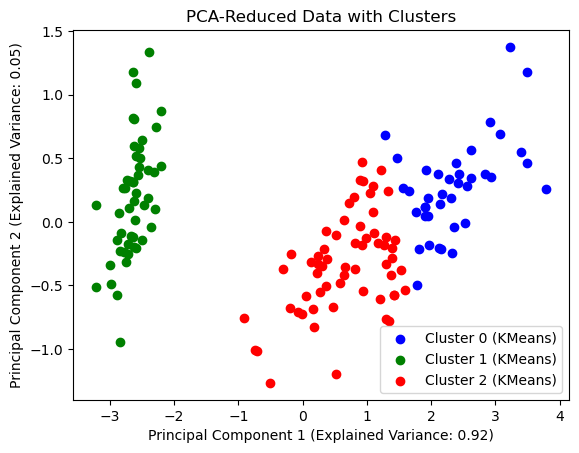

In [9]:
# Plot the PCA-reduced data with cluster colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot KMeans clusters
for cluster in np.unique(kmeans_labels):
    plt.scatter(data_pca[kmeans_labels == cluster, 0],
                data_pca[kmeans_labels == cluster, 1],
                color=colors[cluster],
                label=f'Cluster {cluster} (KMeans)')

# You can plot MeanShift and Hierarchical clusters similarly

plt.title('PCA-Reduced Data with Clusters')
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.legend()
plt.show()